# Fine map signal on chr7 for BMI and Asthma

We have performed GWAS on UKBB for BMI and Asthma. We found a region on chr7 where there is a signal overlap between these traits. We use fine-mapping to see if there are anything of interest

## Analysis workflow

In [ ]:
[global]
parameter: sumstatFile = path()
parameter: ldFile = path()
parameter: cwd = path('output')

In [3]:
[default_1]
parameter: N = 339353
input: sumstatFile, ldFile
output: f"{cwd:a}/{_input[0]:bnn}.SuSiE_RSS.rds"
R: expand = "${ }"
    sumstat = read.csv(${_input[0]:r}, sep = '\t', header=T,stringsAsFactors=F)
    ld = read.csv(${_input[1]:r}, sep = '\t', header=T, stringsAsFactors=F)
    snps = sumstat[,1]
    snps = snps[which(!(duplicated(snps)|duplicated(snps, fromLast=TRUE)))]
    idx1 = match(snps, sumstat[,1])
    idx2 = match(snps, ld[,1])
    ld = ld[,-1]
    ld = ld[idx2,idx2]
    sumstat = sumstat[idx1,]
    res = susieR::susie_rss(sumstat$BETA/sumstat$SE, as.matrix(ld), z_ld_weight = 1/${N}, 
                            L = 10,
                            estimate_residual_variance = TRUE, check_R=F,
                            estimate_prior_variance = TRUE, check_z = F)
    res$pos = sumstat$POS
    res$z = sumstat$BETA/sumstat$SE
    res$p = sumstat$P
    res$var_names = sumstat$SNP
    saveRDS(res, ${_output:r})

[default_2]
parameter: start = 28139386
parameter: end = 28259874
output: f"{_input:n}.png"
R: expand = "${ }"
    res = readRDS(${_input:r})
    png(${_output:r}, width = 8, height=5, unit='in', res=300)
    susieR::susie_plot(res, y="PIP",pos=list(attr='pos', start=${start},end=${end}))
    dev.off()

In [5]:
%cd ~/tmp/07-Jul-2020

/home/gw/tmp/07-Jul-2020

For asthma,

In [38]:
sos run SuSiE_RSS.ipynb \
    --sumstatFile 7_28139386_28259874/ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.sumstats.gz \
    --ldFile 7_28139386_28259874/ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.sample_ld.gz

INFO: Running default_1: 
Warning message:
In set_R_attributes(R, r_tol) : Negative eigenvalues are set to 0
INFO: default_1 is completed.
INFO: default_1 output:   /home/gw/tmp/07-Jul-2020/output/ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.rds
INFO: Running default_2: 
INFO: default_2 (index=0) is ignored due to saved signature
INFO: default_2 output:   /home/gw/tmp/07-Jul-2020/output/ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.png
INFO: Workflow default (ID=f98c56b76d448735) is executed successfully with 1 completed step and 1 ignored step.


For BMI,

In [39]:
sos run SuSiE_RSS.ipynb \
    --sumstatFile 7_28139386_28259874/ukb_imp_v3.UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-BMI_withagesex_041720.BoltLMM.snp_stats.all_chr_7_28139386_28259874.sumstats.gz \
    --ldFile 7_28139386_28259874/ukb_imp_v3.UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-BMI_withagesex_041720.BoltLMM.snp_stats.all_chr_7_28139386_28259874.population_ld.gz

INFO: Running default_1: 
Warning message:
In set_R_attributes(R, r_tol) : Negative eigenvalues are set to 0
INFO: default_1 is completed.
INFO: default_1 output:   /home/gw/tmp/07-Jul-2020/output/ukb_imp_v3.UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-BMI_withagesex_041720.BoltLMM.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.rds
INFO: Running default_2: 
INFO: default_2 (index=0) is ignored due to saved signature
INFO: default_2 output:   /home/gw/tmp/07-Jul-2020/output/ukb_imp_v3.UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-BMI_withagesex_041720.BoltLMM.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.png
INFO: Workflow default (ID=f89bc0349605f139) is executed successfully with 1 completed step and 1 ignored step.


## Fine-map results

In [89]:
%cd ~/tmp/07-Jul-2020/output

/home/gw/tmp/07-Jul-2020/output

> ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.png (58.3 KiB):

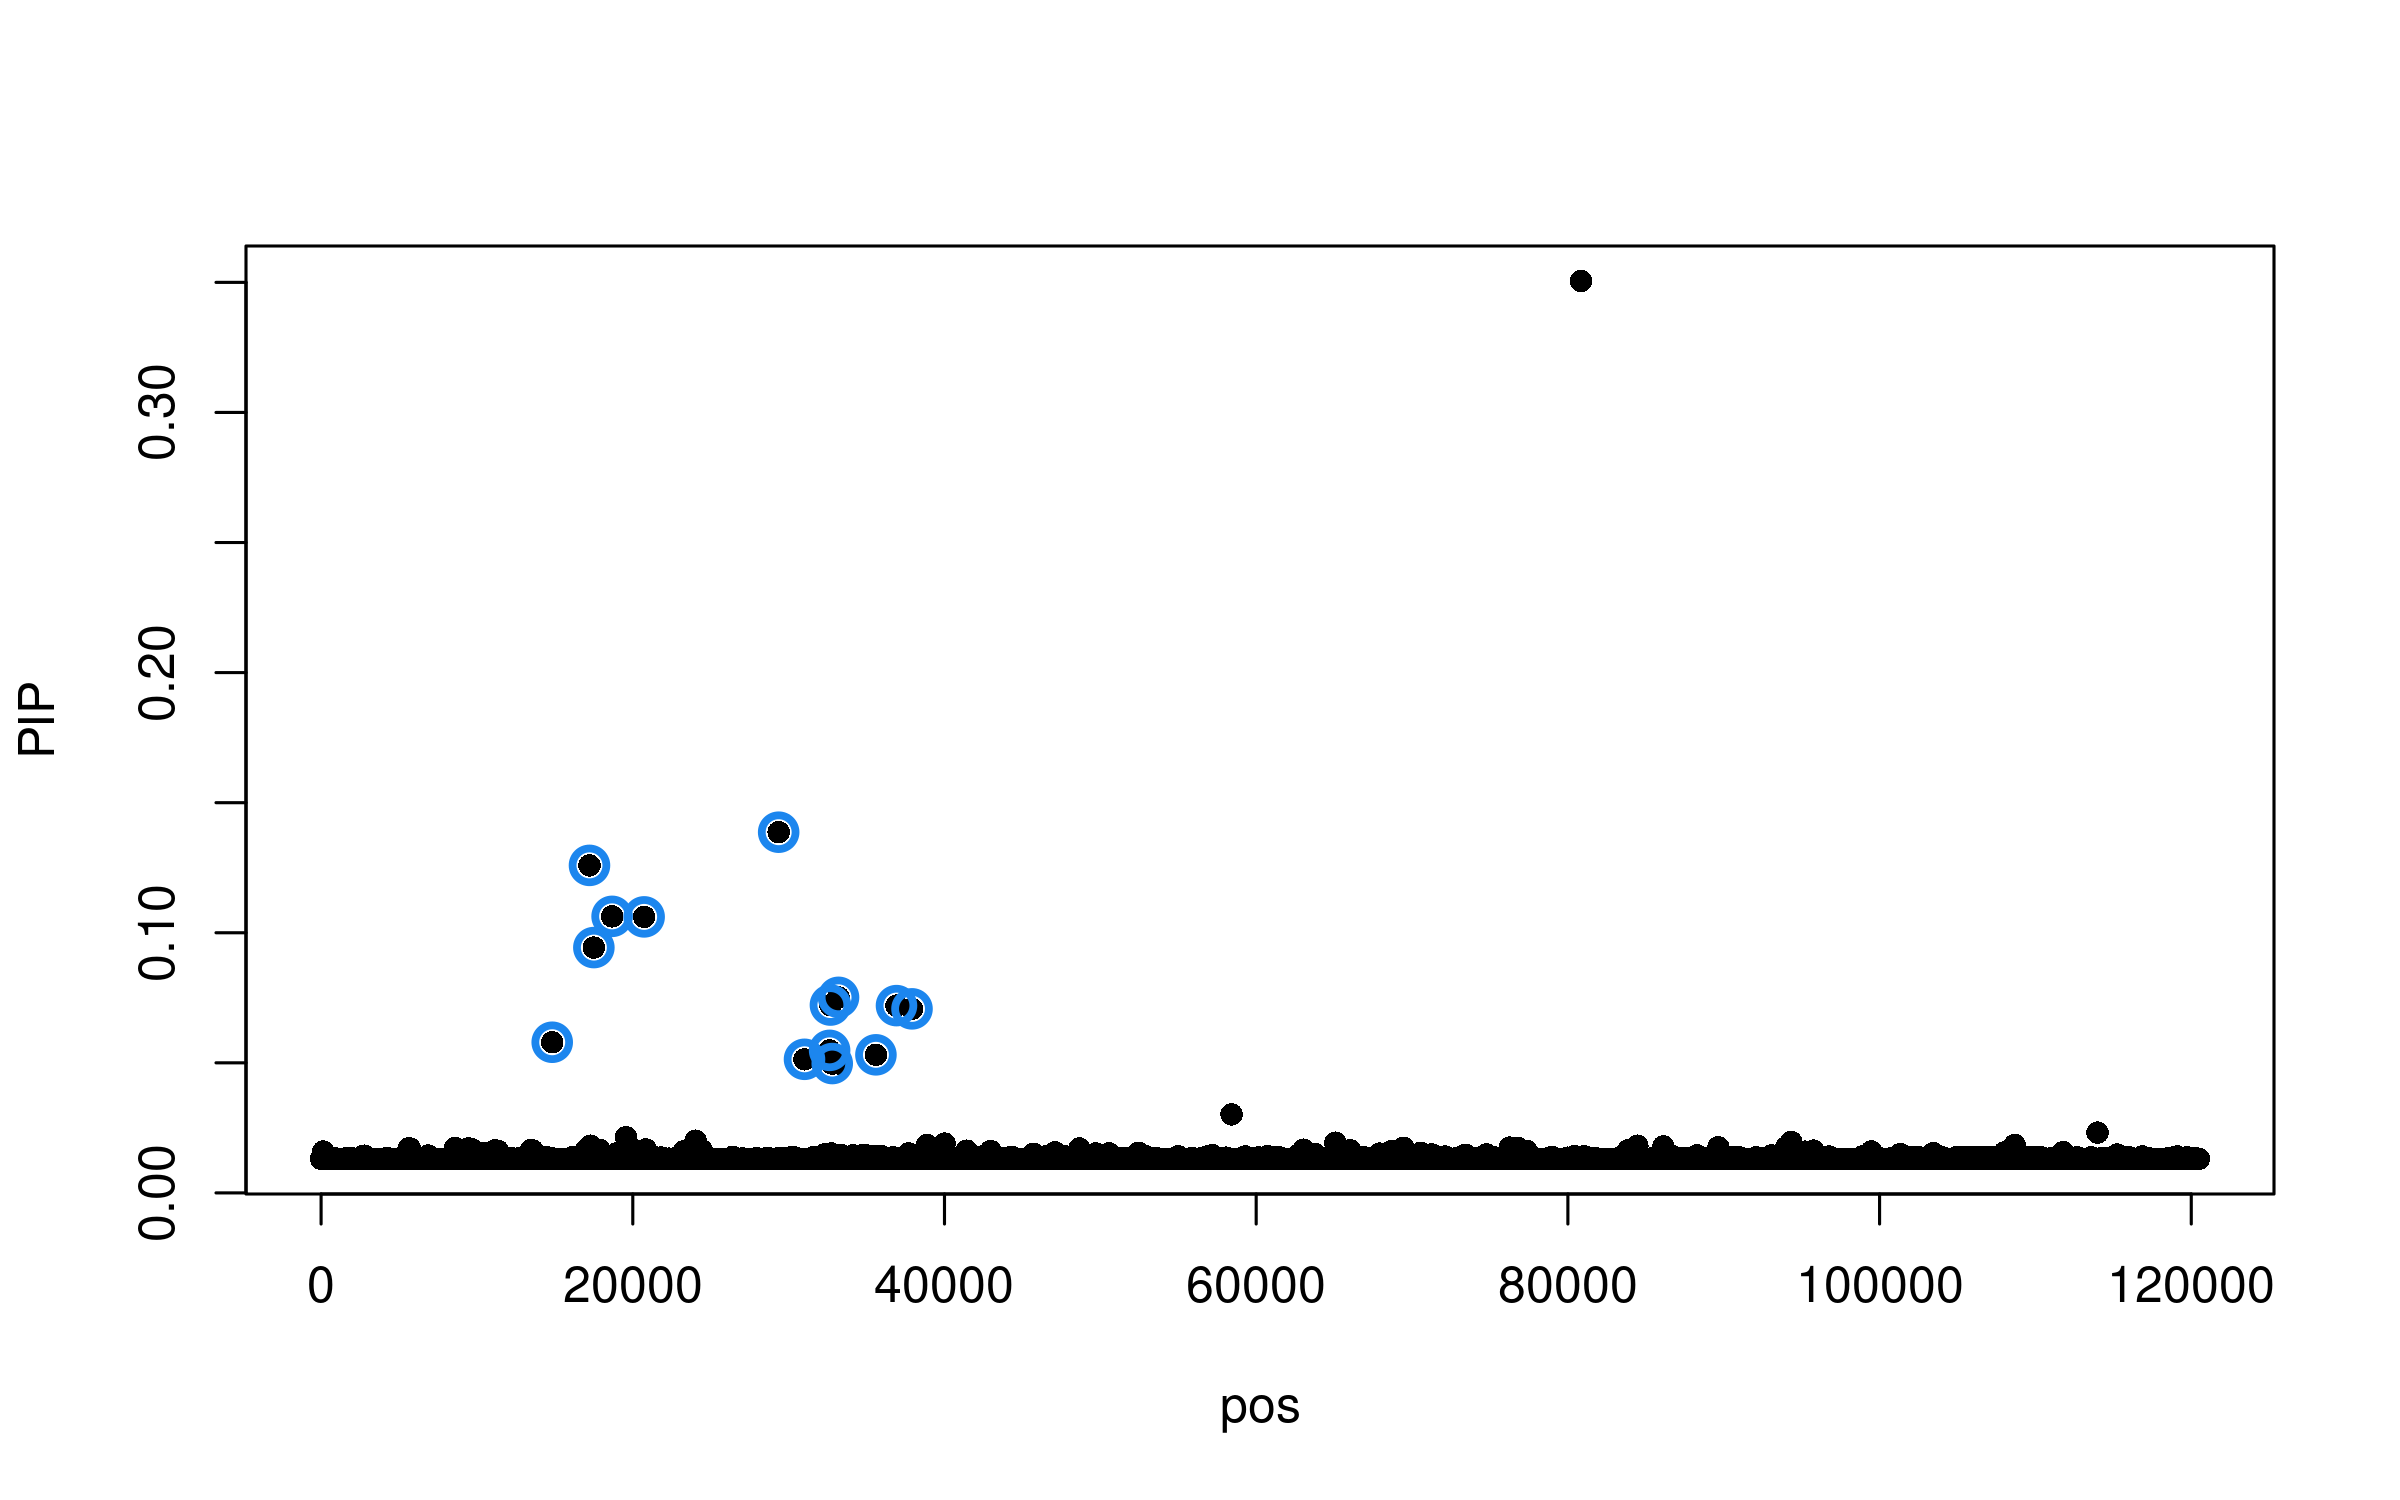

In [90]:
%preview ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.png

> ukb_imp_v3.UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-BMI_withagesex_041720.BoltLMM.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.png (70.2 KiB):

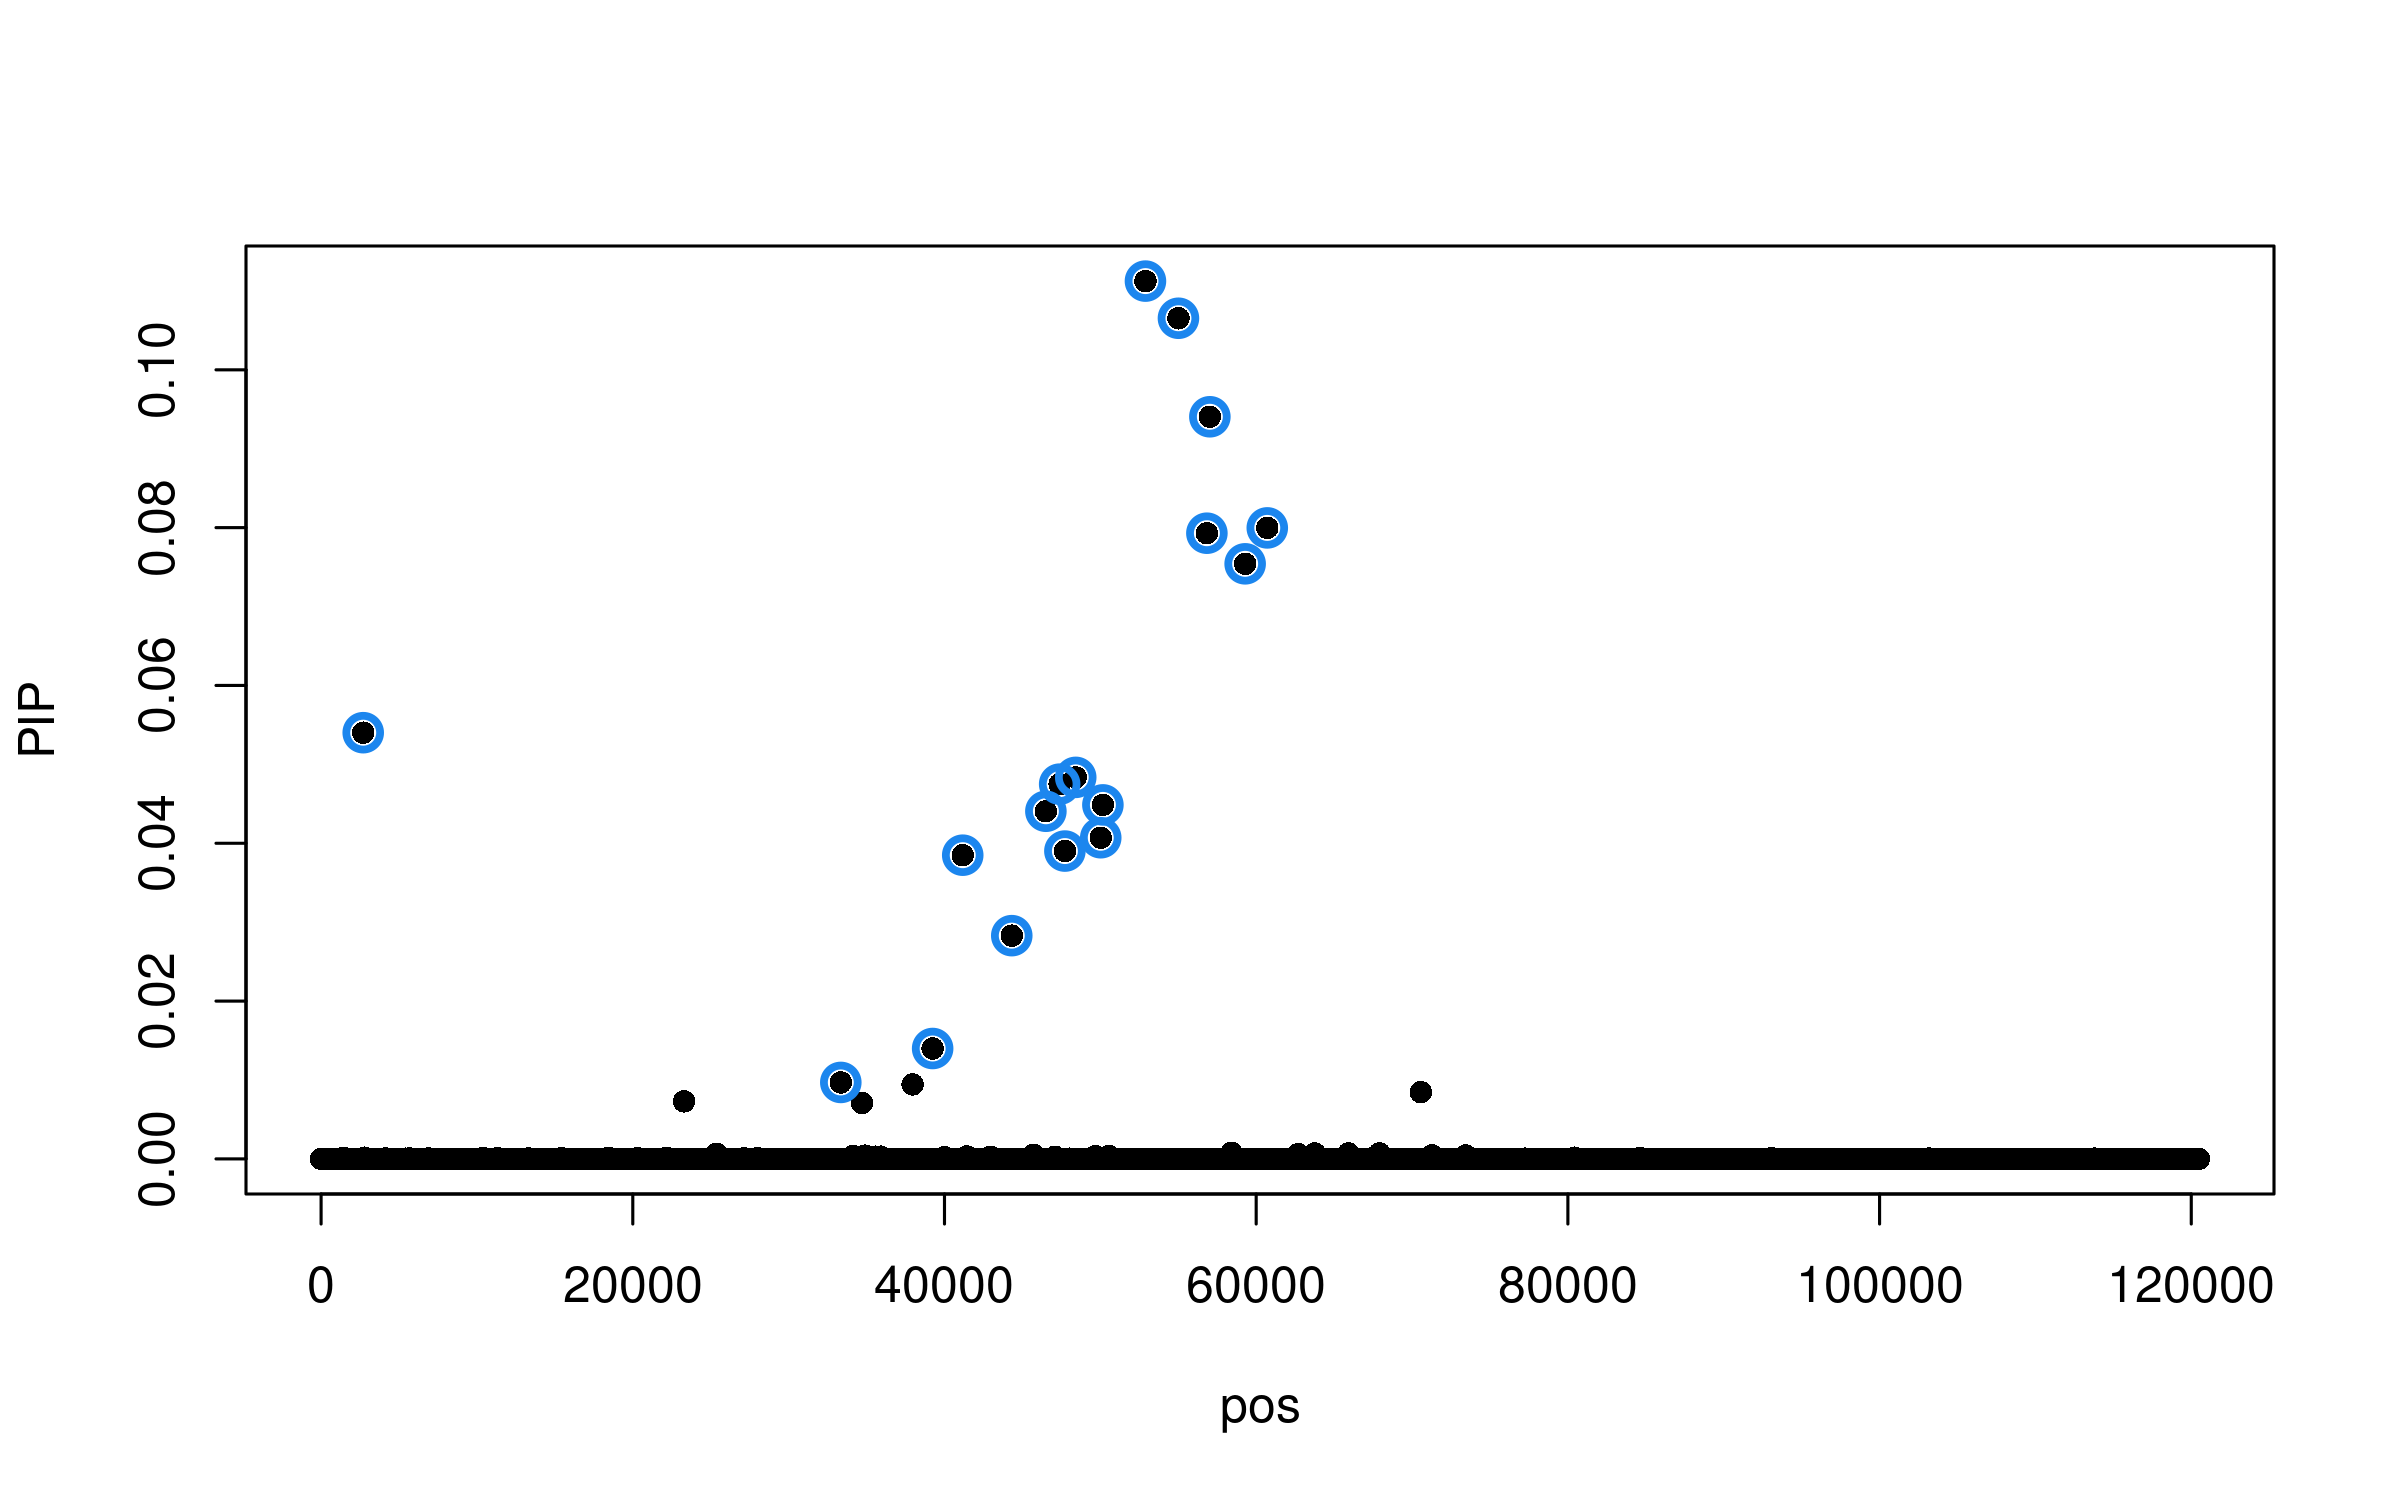

In [91]:
%preview ukb_imp_v3.UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-BMI_withagesex_041720.BoltLMM.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.png

## Problems

### Pleiotropy

First, let's look into the signals detected,

In [51]:
asthma = readRDS('output/ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.rds')
bmi = readRDS('output/ukb_imp_v3.UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-BMI_withagesex_041720.BoltLMM.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.rds')

In [52]:
names(bmi)

[1] "alpha"                  "mu"                     "mu2"                   
 [4] "Xr"                     "KL"                     "lbf"                   
 [7] "sigma2"                 "V"                      "pi"                    
[10] "null_index"             "converged"              "elbo"                  
[13] "niter"                  "intercept"              "fitted"                
[16] "sets"                   "pip"                    "X_column_scale_factors"
[19] "Rz"                     "pos"                    "z"                     
[22] "p"                      "var_names"

Variables in CS:

In [53]:
bmi$sets$cs

$L1
 [1]  24 245 285 299 316 326 330 333 344 353 354 366 374 383 386 391 404

In [54]:
bmi_vars = bmi$var_names[unlist(bmi$sets$cs)]

In [55]:
asthma_vars = asthma$var_names[unlist(asthma$sets$cs)]

In [56]:
bmi_vars

[1] "rs10274928"      "rs702814"        "7:28178625_TG_T" "rs864745"       
 [5] "rs849140"        "rs849142"        "rs11455969"      "rs10622246"     
 [9] "rs1635851"       "rs1635852"       "rs1635853"       "rs849133"       
[13] "rs860262"        "rs849134"        "rs849135"        "rs1708302"      
[17] "rs1513272"

In [57]:
asthma_vars

[1] "7:28154215_GT_G"    "rs4722758"          "rs6977955"         
 [4] "rs4719922"          "rs9648346"          "7:28168745_GTCTT_G"
 [7] "rs2893312"          "rs2189965"          "rs2189966"         
[10] "rs4722760"          "rs917115"           "rs67250450"        
[13] "rs917117"           "rs11495981"

In [58]:
intersect(bmi_vars, asthma_vars)

character(0)

There is no intersect between BMI and Asthma variables -- it does not seem to have a pleiotropy effect looking at the fine mapping result. **Also recall that BMI analysis controlled for Asthma as a covariate.**

### An issue with Asthma result

In [75]:
res = data.frame(cbind(asthma$var_names, asthma$pip, asthma$p, asthma$z))
colnames(res) = c('rsID', 'PIP', 'p-value', 'z-score')

In [76]:
tops = head(res[order(abs(as.double(res[,4])), decreasing = T),], 30)

In [77]:
tops[!(tops$rsID %in% asthma_vars),]

,rsID,PIP,p-value,z-score
,<fct>,<fct>,<fct>,<fct>
436,rs849335,0.0144353099339476,3.02806e-10,6.29733864112154
486,rs849327,0.0144367391850965,4.74629e-10,6.22727717509752
415,rs849333,0.0141829027588132,4.82443e-10,6.22471280283744
437,rs849336,0.0143453738393939,4.9318e-10,6.22126534399166
608,rs498475,0.0140026133720034,3.96267e-09,5.88575000140771
228,7:28178625_TG_T,0.0149210477162338,4.34713e-08,5.4761369148465
67,rs11767776,0.013215390115251,4.85253e-08,5.45663547995004
76,rs10276070,0.0132016858363796,5.47971e-08,5.43500164949145
65,rs11771411,0.0132135966800642,5.62336e-08,5.43038096581811


`rs849335` is not in any CS, but it has p-value `3.02806e-10`.

To understand, we have to see how many variables are in high LD with it:

In [79]:
ld = '7_28139386_28259874/ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.sample_ld.gz'
ld = read.csv(ld, sep = '\t', header=T, stringsAsFactors=F)

In [83]:
ld_i = ld[which(ld[,1] == "rs849335"),][-1]

In [87]:
high_ld = ld[,1][which(ld_i>0.8)]

In [88]:
res[res$rsID %in% high_ld,]

,rsID,PIP,p-value,z-score
,<fct>,<fct>,<fct>,<fct>
415,rs849333,0.0141829027588132,4.82443e-10,6.22471280283744
436,rs849335,0.0144353099339476,3.02806e-10,6.29733864112154
437,rs849336,0.0143453738393939,4.9318e-10,6.22126534399166
486,rs849327,0.0144367391850965,4.74629e-10,6.22727717509752
565,rs11448038,0.0135519312440443,7.76813e-07,4.9411074385504
608,rs498475,0.0140026133720034,3.96267e-09,5.88575000140771


It is not many of them at all, but all their PIPs are very small.